In [2]:
import datetime
import IPython
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv
import time
from matplotlib import pyplot
from numpy import mean
from numpy import std
from urllib.parse import urlparse

In [3]:
import pickle

In [4]:
df_original = pd.read_csv("01.df.procesado.csv")
# df_original = pd.read_csv("https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/02.TP/01.df.procesado.csv")

In [5]:
df_original.shape

(2452, 99)

In [6]:
df_original.dtypes

Unnamed: 0                        int64
file_path                        object
modality                          int64
vocal_channel                     int64
emotion                           int64
                                 ...   
MeanVoicedSegmentLengthSec      float64
StddevVoicedSegmentLengthSec    float64
MeanUnvoicedSegmentLength       float64
StddevUnvoicedSegmentLength     float64
equivalentSoundLevel_dBp        float64
Length: 99, dtype: object

In [7]:
df_original.head()

,Unnamed: 0,file_path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,start,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,0,./audios/ravdess/Actor_23/03-01-07-02-02-01-23...,3,1,7,2,2,1,23,0 days 00:00:00,...,0.075190,0.014015,0.022255,2.150538,1.089918,0.2825,0.126763,0.4900,0.397291,-36.658245
1,1,./audios/ravdess/Actor_23/03-02-03-02-02-01-23...,3,2,3,2,2,1,23,0 days 00:00:00,...,0.020998,0.009869,0.018871,1.492537,0.646552,0.8200,0.277248,0.5275,0.438770,-29.391884
2,2,./audios/ravdess/Actor_23/03-01-04-01-02-01-23...,3,1,4,1,2,1,23,0 days 00:00:00,...,0.047365,0.011048,0.011381,2.247191,0.569801,0.5900,0.160000,0.7600,0.296985,-43.332924
3,3,./audios/ravdess/Actor_23/03-02-04-02-02-01-23...,3,2,4,2,2,1,23,0 days 00:00:00,...,0.041743,0.012340,0.007390,1.394422,0.603622,0.9300,0.885701,0.5275,0.420260,-37.549572
4,4,./audios/ravdess/Actor_23/03-01-02-02-02-02-23...,3,1,2,2,2,2,23,0 days 00:00:00,...,0.053580,0.011590,0.005245,1.535088,0.886918,0.3875,0.206079,0.5740,0.424999,-43.261425


<BarContainer object of 24 artists>

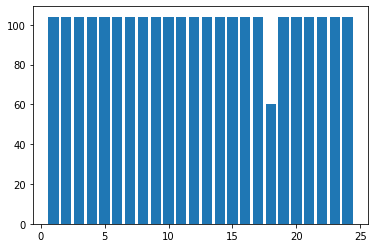

In [8]:
plt.bar(
    df_original.groupby(["actor"]).file_path.count().index,
    df_original.groupby(["actor"]).file_path.count(),
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


[Text(0.0, 0, ''),
 Text(1.0, 0, 'Neutral'),
 Text(2.0, 0, 'Calm'),
 Text(3.0, 0, 'Happy'),
 Text(4.0, 0, 'Sad'),
 Text(5.0, 0, 'Angry'),
 Text(6.0, 0, 'Fear.'),
 Text(7.0, 0, 'Disg.'),
 Text(8.0, 0, 'Surpr.'),
 Text(9.0, 0, '')]

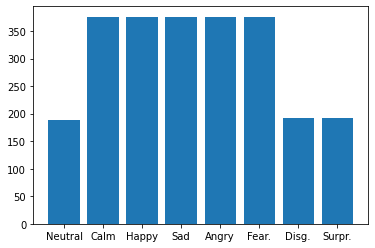

In [21]:
ax = plt.subplot()
plt.bar(
    df_original.groupby(["emotion"]).file_path.count().index,
    df_original.groupby(["emotion"]).file_path.count(),
)

ax.xaxis.set_ticklabels(["", "Neutral", "Calm", "Happy", "Sad", "Angry", "Fear.", "Disg.", "Surpr."])


<BarContainer object of 2 artists>

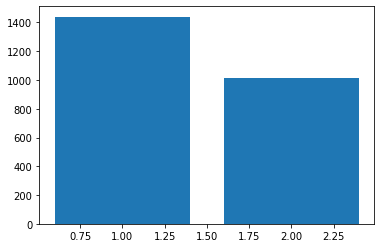

In [10]:
plt.bar(
    df_original.groupby(["vocal_channel"]).file_path.count().index,
    df_original.groupby(["vocal_channel"]).file_path.count(),
)

In [11]:
df_original.columns

Index(['Unnamed: 0', 'file_path', 'modality', 'vocal_channel', 'emotion',
       'emotional_intensity', 'statement', 'repetition', 'actor', 'start',
       'end', 'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loud

<AxesSubplot:xlabel='emotion'>

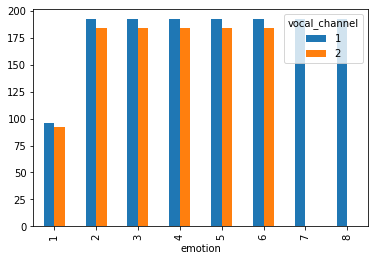

In [23]:
pd.crosstab(df_original['emotion'],df_original['vocal_channel']).plot.bar()

In [12]:
# analize_report = sv.analyze(df_original)
# analize_report.show_html("analize.html", open_browser=True)

In [13]:
# IPython.display.HTML("02.Analisis.exploratorio.html")

### Categóricos

In [14]:
round(df_original.describe(exclude=["float", "int64"]), 2)

,file_path,start,end
count,2452,2452,2452
unique,2452,1,157
top,./audios/ravdess/Actor_01/03-01-06-02-02-01-01...,0 days 00:00:00,0 days 00:00:03.503499999
freq,1,2452,67
